In [5]:
input_variable = "% Lower Income Population"
target_variable = "Median Home Value"

In [23]:
def plot_prediction(x,y,xp,yp,input_variable, target_variable,title="",filename=""):
    """Plots the original data (x,y) and a set of point (xp,yp) showing the model approximation"""
    
    plt.figure(figsize=(fig_width,fig_height))

    font = {'family' : 'sans', 'size'   : fig_font_size}
    plt.rc('font', **font)

    plt.scatter(x, y,  color='blue')
    
    plt.plot(xp, yp, color='red', linewidth=3)
        
    plt.xlabel(input_variable)
    plt.ylabel(target_variable)
    
    plt.title(title)

    plt.xlim([0,40])
    plt.ylim(0,55)
    
        
    if (filename!=""):
        plt.savefig(filename)
        
    plt.show()


In [24]:
# compute the data inputs
X = df[input_variable].values.reshape(-1,1)
y = df[target_variable].values.ravel()

# input values used to plot the predicted model
X_test = np.linspace(np.min(X), np.max(X), 500)[:, np.newaxis]

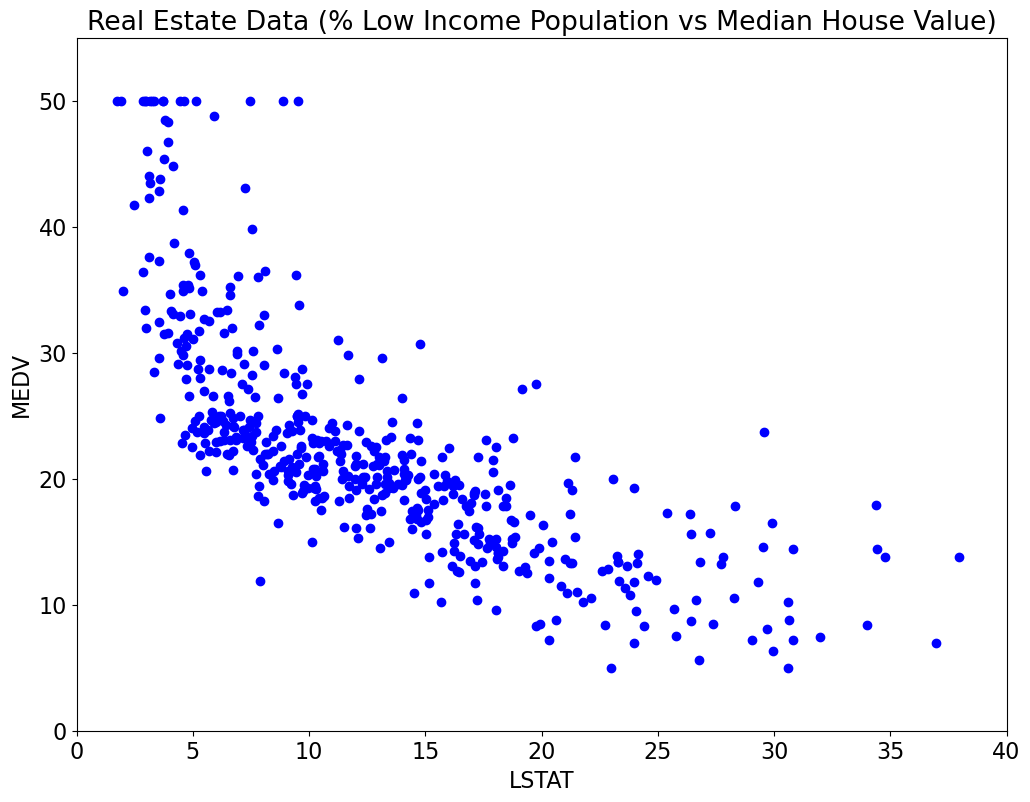

In [34]:
plt.figure(figsize=(fig_width,fig_height))

font = {'family' : 'sans', 'size'   : fig_font_size}
plt.rc('font', **font)

plt.scatter(X, y,  color='blue')

plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.title("Real Estate Data (% Low Income Population vs Median House Value)")

plt.xlim([0,40])
plt.ylim(0,55)

plt.savefig("Real Estate Data.png", dpi=300)
plt.show()

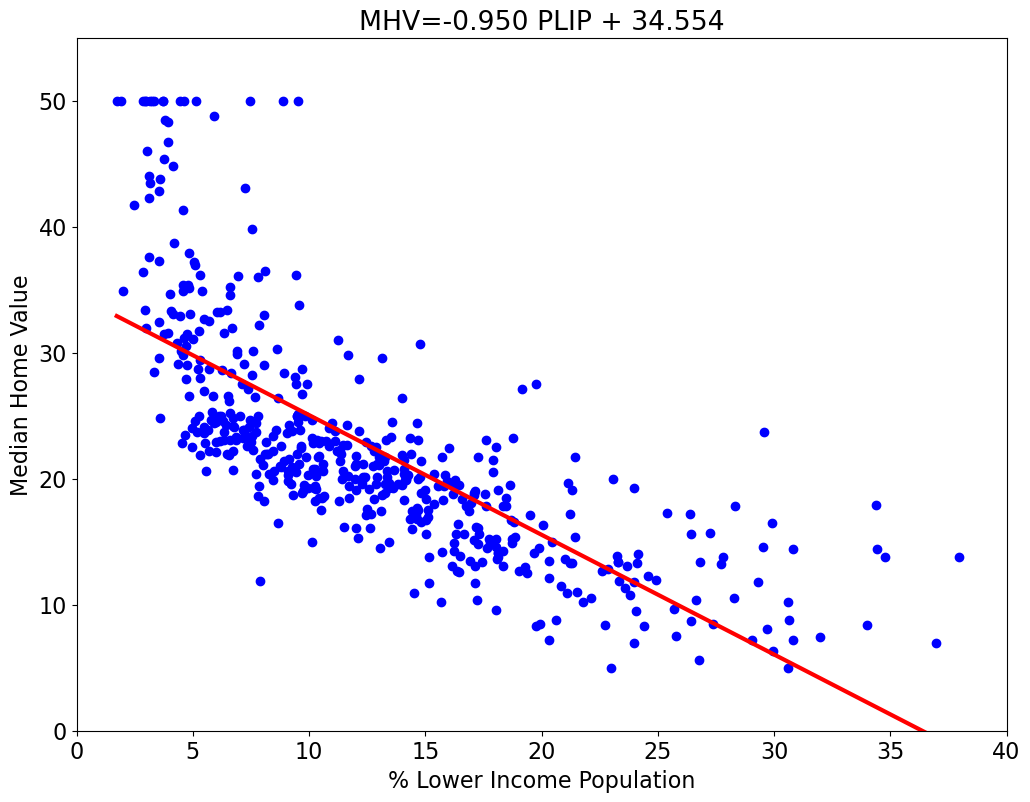

In [27]:
# simple linear regression
regr = linear_model.LinearRegression()
regr.fit(X, y)

# model output for the input data
y_test = regr.predict(X_test)

# plot the result
plot_prediction(X, y, X_test, y_test, input_variable, target_variable, "MHV=%.3f PLIP + %.3f" % (regr.coef_[0],regr.intercept_),'RealEstate-LinearRegression.png');

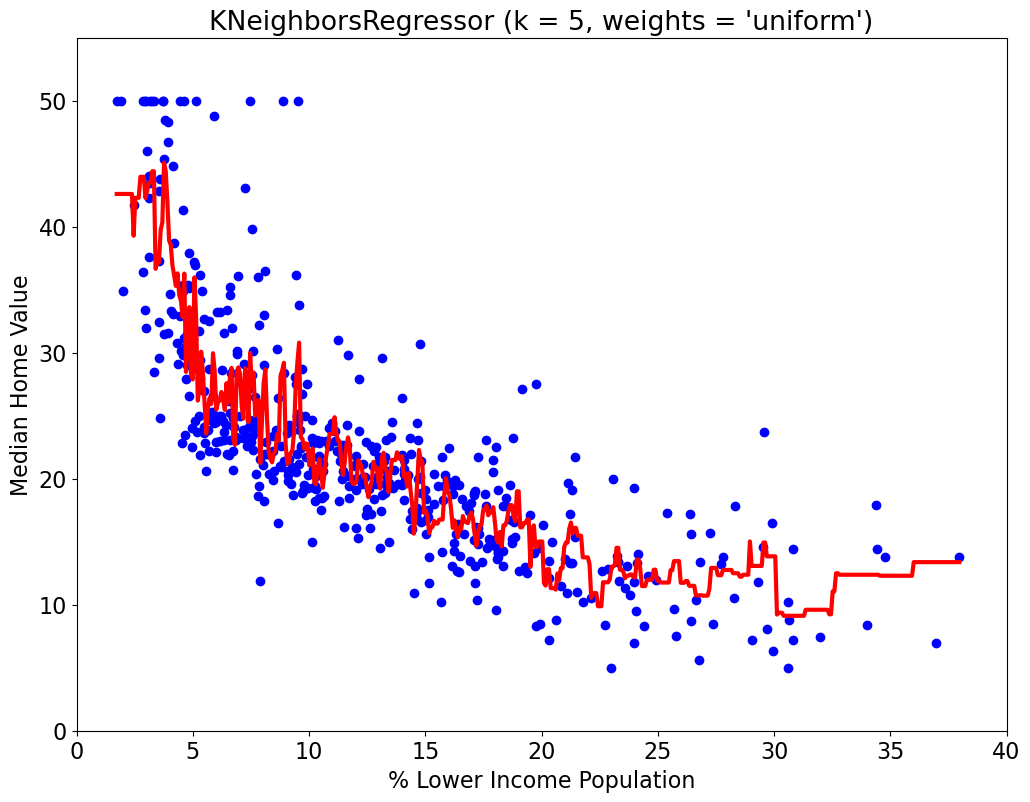

In [35]:
knn = neighbors.KNeighborsRegressor(5, weights='uniform')

knn.fit(X, y)

y_test = knn.predict(X_test)

plot_prediction(X,y,X_test,y_test, input_variable, target_variable, "KNeighborsRegressor (k = 5, weights = 'uniform')", filename="RealEstate-KNN5.png");

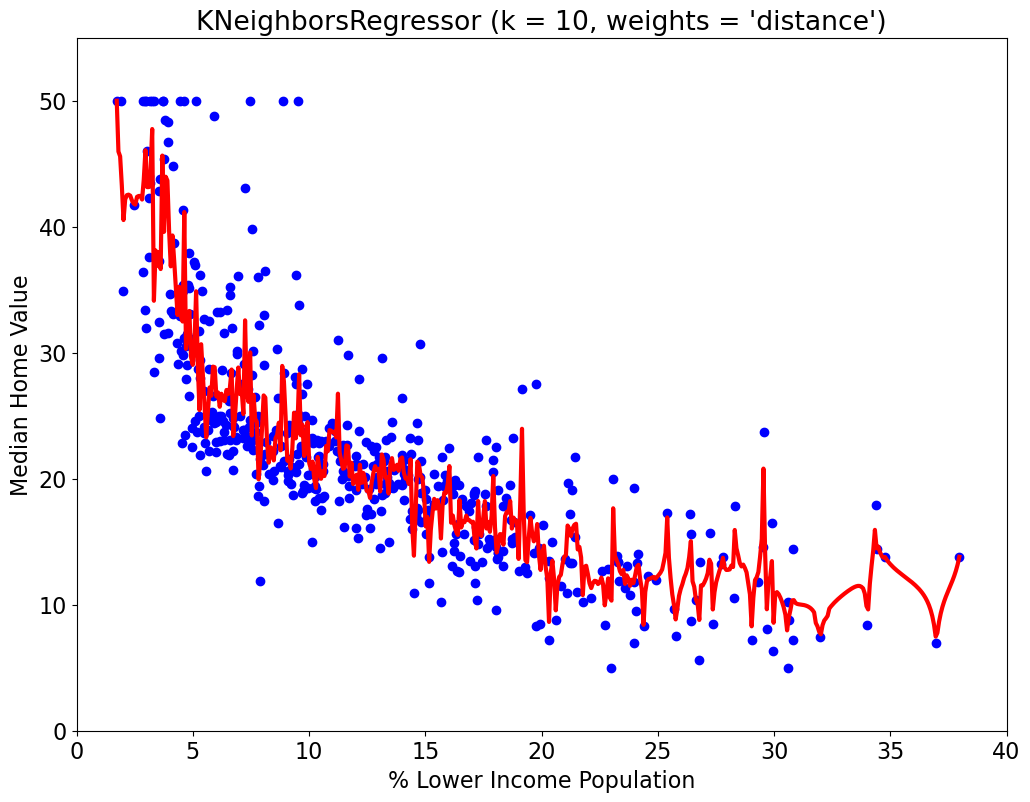

In [36]:
knn = neighbors.KNeighborsRegressor(10, weights='distance')

knn.fit(X, y)

y_test = knn.predict(X_test)

plot_prediction(X, y, X_test, y_test, input_variable, target_variable, "KNeighborsRegressor (k = 10, weights = 'distance')", filename="RealEstate-KNN10.png");

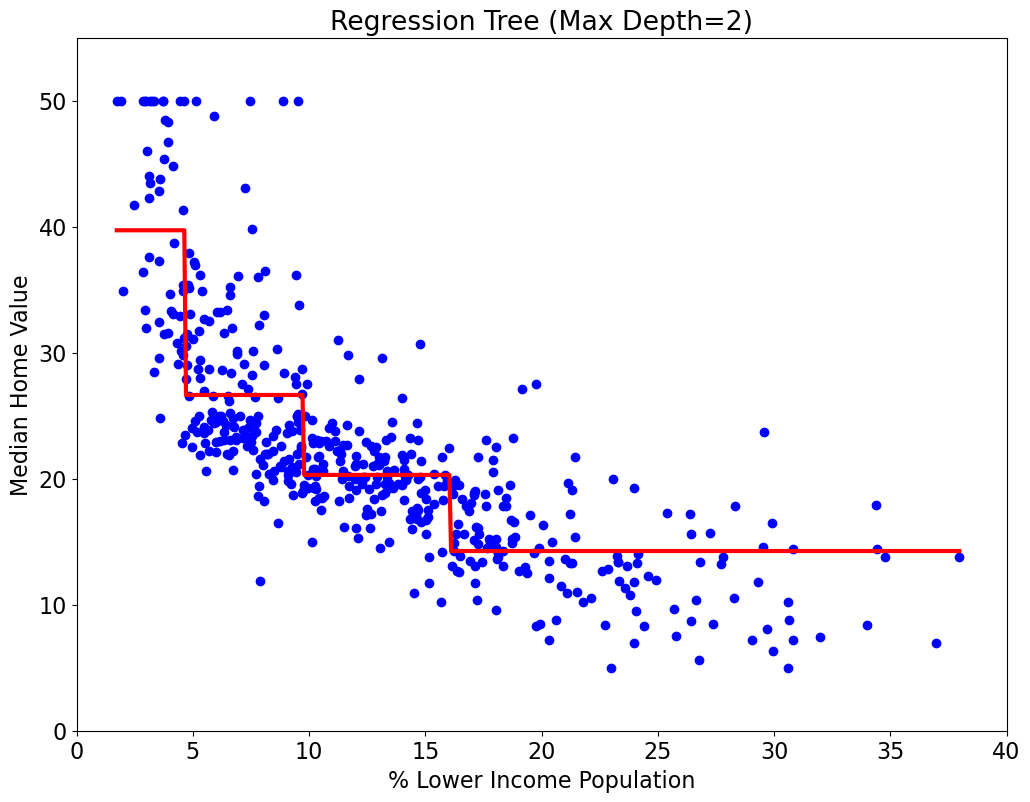

In [37]:
regression_tree = DecisionTreeRegressor(max_depth=2)
regression_tree.fit(X,y.ravel())
y_test = regression_tree.predict(X_test)

plot_prediction(X, y, X_test, y_test, input_variable, target_variable, "Regression Tree (Max Depth=2)", filename="RealEstate-RegressionTree-Depth2.png");

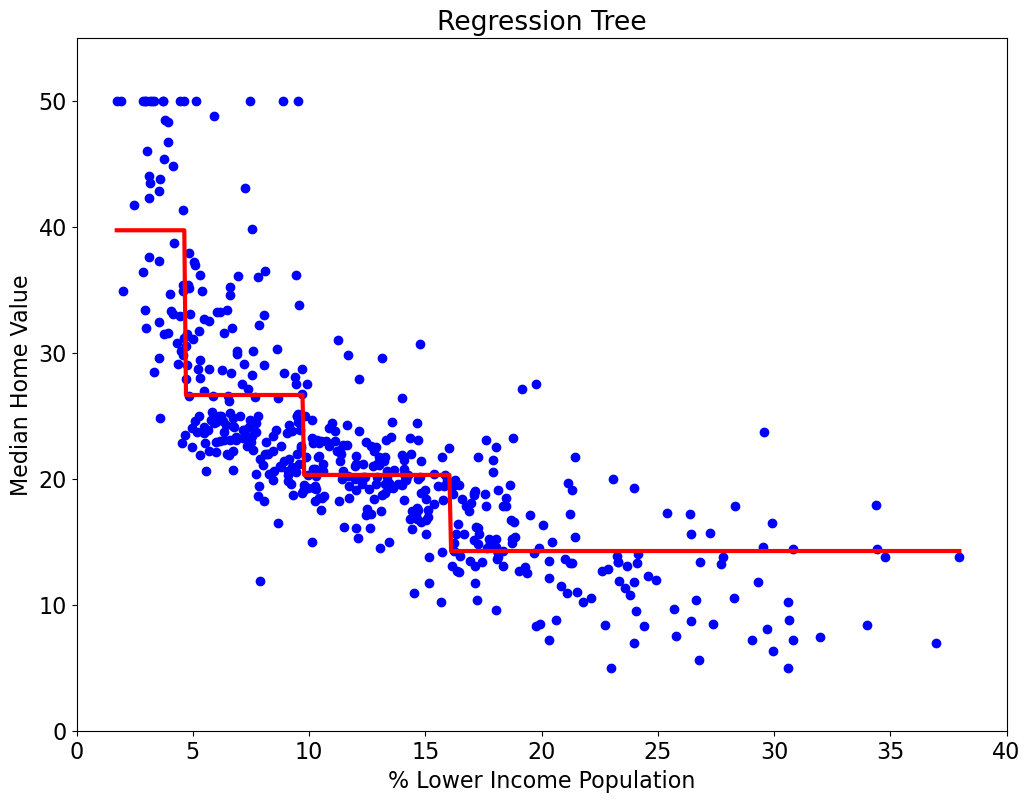

In [38]:
# implementation of the model developed using KNIME

def TreeModel(x):
    if (x<=9.725):
        if (x<=4.65):
            return 39.718
        else:
            return 26.6463
    else:
        if (x<=16.08):
            return 20.302
        else:
            return 14.2618


y_test = np.vectorize(TreeModel)(X_test)

plot_prediction(X,y,X_test,y_test, input_variable, target_variable, "Regression Tree", filename="RealEstate-RegressionTree.png");

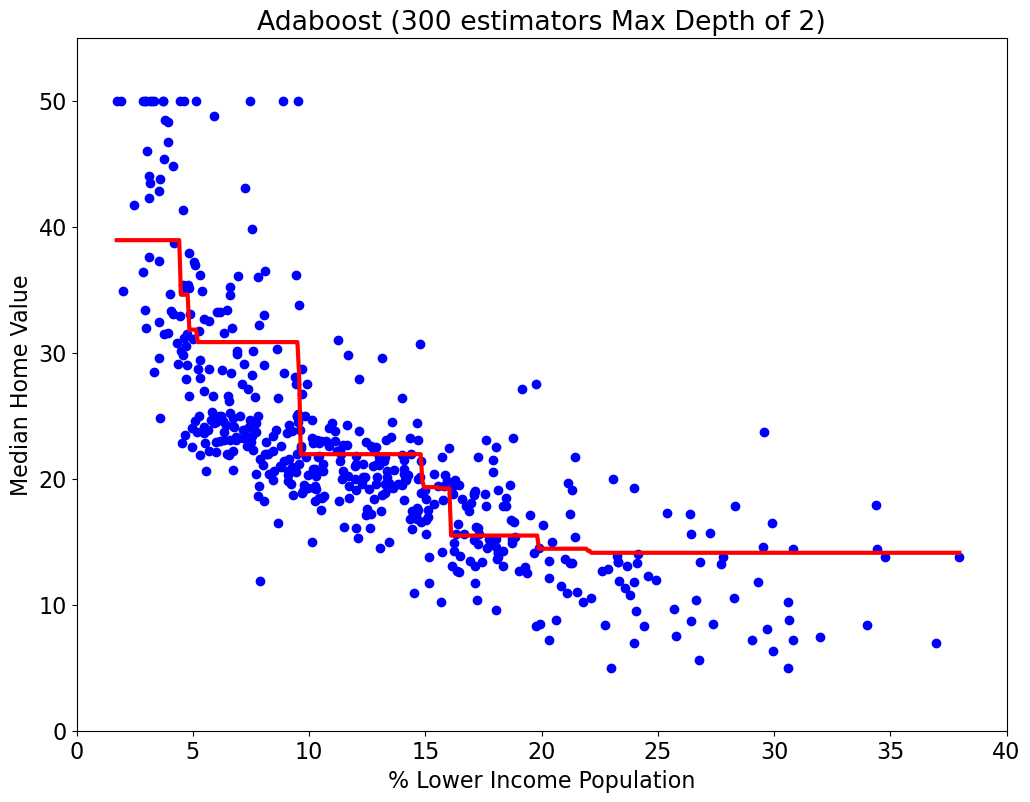

In [39]:
adaboost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=300, random_state=random_seed)
adaboost_model.fit(X, y.ravel())

y_test = adaboost_model.predict(X_test)

plot_prediction(X, y, X_test, y_test, input_variable, target_variable, "Adaboost (300 estimators Max Depth of 2)", filename="RealEstate-AdaBoost.png");